In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).\
filter(extract('month', Measurement.date) == 6)

In [5]:
#  3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) == 6).all()
print(june_temp)

[(78.0,), (76.0,), (78.0,), (76.0,), (77.0,), (78.0,), (77.0,), (78.0,), (78.0,), (79.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (77.0,), (77.0,), (82.0,), (78.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (78.0,), (78.0,), (77.0,), (78.0,), (73.0,), (70.0,), (76.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (75.0,), (76.0,), (76.0,), (77.0,), (78.0,), (76.0,), (77.0,), (75.0,), (77.0,), (76.0,), (76.0,), (75.0,), (77.0,), (77.0,), (76.0,), (78.0,), (77.0,), (76.0,), (77.0,), (76.0,), (76.0,), (77.0,), (77.0,), (78.0,), (77.0,), (77.0,), (77.0,), (76.0,), (75.0,), (76.0,), (76.0,), (77.0,), (76.0,), (73.0,), (73.0,), (75.0,), (77.0,), (76.0,), (77.0,), (79.0,), (78.0,), (79.0,), (78.0,), (78.0,), (79.0,), (77.0,), (77.0,), (77.0,), (77.0,), (77.0,), (78.0,), (77.0,), (76.0,), (78.0,), (78.0,), (77.0,), (78.0,), (78.0,), (73.0,), (76.0,), (77.0,), (75.0,), (76.0,), (74.0,), 

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df_june= pd.DataFrame(june_temp, columns=['Temperatures of June'])
print(df_june)

      Temperatures of June
0                     78.0
1                     76.0
2                     78.0
3                     76.0
4                     77.0
...                    ...
1695                  79.0
1696                  74.0
1697                  74.0
1698                  76.0
1699                  75.0

[1700 rows x 1 columns]


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,Temperatures of June
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).\
filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
dic_temp = session.query(Measurement.tobs).\
    filter(extract('month', Measurement.date) == 12).all()
print(dic_temp)

[(76.0,), (74.0,), (74.0,), (64.0,), (64.0,), (67.0,), (77.0,), (66.0,), (69.0,), (68.0,), (68.0,), (71.0,), (74.0,), (67.0,), (66.0,), (69.0,), (71.0,), (70.0,), (70.0,), (74.0,), (74.0,), (71.0,), (75.0,), (75.0,), (72.0,), (69.0,), (68.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (73.0,), (71.0,), (73.0,), (73.0,), (77.0,), (72.0,), (71.0,), (73.0,), (70.0,), (73.0,), (69.0,), (74.0,), (72.0,), (71.0,), (72.0,), (72.0,), (70.0,), (73.0,), (73.0,), (72.0,), (73.0,), (73.0,), (72.0,), (63.0,), (65.0,), (71.0,), (76.0,), (70.0,), (76.0,), (69.0,), (69.0,), (69.0,), (74.0,), (76.0,), (74.0,), (73.0,), (73.0,), (74.0,), (73.0,), (73.0,), (73.0,), (74.0,), (74.0,), (71.0,), (73.0,), (72.0,), (64.0,), (66.0,), (73.0,), (72.0,), (65.0,), (64.0,), (69.0,), (68.0,), (77.0,), (71.0,), (71.0,), (69.0,), (68.0,), (68.0,), (69.0,), (70.0,), (72.0,), (76.0,), (75.0,), (69.0,), (71.0,), (71.0,), (71.0,), (68.0,), (65.0,), (70.0,), (69.0,), (69.0,), (71.0,), (67.0,), (73.0,), (74.0,), (73.0,), 

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dic = pd.DataFrame(dic_temp, columns=['Temperatures of December'])
print(df_dic)

      Temperatures of December
0                         76.0
1                         74.0
2                         74.0
3                         64.0
4                         64.0
...                        ...
1512                      71.0
1513                      71.0
1514                      69.0
1515                      65.0
1516                      65.0

[1517 rows x 1 columns]


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dic.describe()

,Temperatures of December
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
# Deliverable 3
from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [13]:
# Get the column names for the table
columns = inspector.get_columns('measurement')

for column_name in columns: 
    print (column_name["name"])

id
station
date
prcp
tobs


In [14]:
june = session.query(Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 6).all()
print(june)

[(78.0, 0.0), (76.0, 0.01), (78.0, 0.0), (76.0, 0.0), (77.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (79.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (82.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (76.0, 0.02), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.07), (78.0, 0.0), (73.0, 0.56), (70.0, 0.89), (76.0, 0.0), (77.0, 0.0), (77.0, 0.0), (77.0, 0.03), (77.0, 0.01), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (77.0, 0.0), (78.0, 0.0), (78.0, 0.0), (75.0, 0.05), (76.0, 0.06), (76.0, 0.07), (77.0, None), (78.0, 0.0), (76.0, 0.0), (77.0, 0.01), (75.0, 0.01), (77.0, 0.0), (76.0, 0.02), (76.0, 0.02), (75.0, 0.0), (77.0, 0.0), (77.0, 0.0), (76.0, 0.0), (78.0, 0.0), (77.0, None), (76.0, None), (77.0, 0.0), (76.0, 0.0), (76.0, 0.0), (77.0, 0.0), (77.0, 0.0), (78.0, 0.0), (77.0, 0.0), (77.0, 0.0), (77.0, 0.0), (76.0, 0.0), (75.0, 

In [15]:
december = session.query(Measurement.tobs, Measurement.prcp).\
    filter(extract('month', Measurement.date) == 12).all()
print(december)

[(76.0, 0.04), (74.0, 0.0), (74.0, 0.0), (64.0, 0.0), (64.0, 0.0), (67.0, 0.0), (77.0, 0.0), (66.0, 1.58), (69.0, 0.77), (68.0, 0.0), (68.0, 0.0), (71.0, 0.0), (74.0, 0.0), (67.0, 0.0), (66.0, 0.0), (69.0, 0.0), (71.0, 1.4), (70.0, 0.0), (70.0, 0.0), (74.0, None), (74.0, 0.13), (71.0, 0.55), (75.0, 0.06), (75.0, 0.01), (72.0, 0.0), (69.0, 0.03), (68.0, 0.08), (73.0, 0.0), (74.0, 0.0), (73.0, 0.0), (73.0, 0.0), (73.0, 0.0), (73.0, 0.0), (71.0, 0.13), (73.0, 0.07), (73.0, 0.07), (77.0, 0.08), (72.0, 0.4), (71.0, 0.7), (73.0, 0.0), (70.0, 0.01), (73.0, 0.07), (69.0, 0.02), (74.0, 0.15), (72.0, 0.02), (71.0, 0.18), (72.0, 0.03), (72.0, 0.04), (70.0, 0.1), (73.0, 0.03), (73.0, 0.0), (72.0, 0.0), (73.0, 0.0), (73.0, 0.0), (72.0, 0.0), (63.0, 0.01), (65.0, 0.0), (71.0, 0.0), (76.0, 0.0), (70.0, 0.2), (76.0, 0.01), (69.0, None), (69.0, None), (69.0, 0.0), (74.0, 0.0), (76.0, 0.0), (74.0, 0.0), (73.0, 0.0), (73.0, 0.14), (74.0, 0.09), (73.0, 0.01), (73.0, 0.02), (73.0, 0.02), (74.0, 0.12), (74.

In [16]:
june = pd.DataFrame(june, columns=['Temperatures of June','Precipitation of June'])
december = pd.DataFrame(december, columns=['Temperatures of December','Precipitation of December'])
print(june, december)

      Temperatures of June  Precipitation of June
0                     78.0                   0.00
1                     76.0                   0.01
2                     78.0                   0.00
3                     76.0                   0.00
4                     77.0                   0.00
...                    ...                    ...
1695                  79.0                   0.02
1696                  74.0                   0.10
1697                  74.0                   0.02
1698                  76.0                   0.04
1699                  75.0                   0.20

[1700 rows x 2 columns]       Temperatures of December  Precipitation of December
0                         76.0                       0.04
1                         74.0                       0.00
2                         74.0                       0.00
3                         64.0                       0.00
4                         64.0                       0.00
...                        

In [17]:
june.describe()

,Temperatures of June,Precipitation of June
count,1700.000000,1574.000000
mean,74.944118,0.136360
std,3.257417,0.335731
min,64.000000,0.000000
25%,73.000000,0.000000
50%,75.000000,0.020000
75%,77.000000,0.120000
max,85.000000,4.430000


In [18]:
december.describe()

,Temperatures of December,Precipitation of December
count,1517.000000,1405.000000
mean,71.041529,0.216819
std,3.745920,0.541399
min,56.000000,0.000000
25%,69.000000,0.000000
50%,71.000000,0.030000
75%,74.000000,0.150000
max,83.000000,6.420000


<AxesSubplot:ylabel='Frequency'>

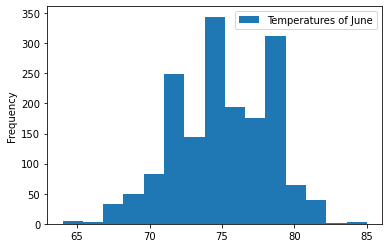

In [19]:
dfjun = pd.DataFrame(june, columns = ['Temperatures of June'])

dfjun.plot.hist(bins=15)

<AxesSubplot:ylabel='Frequency'>

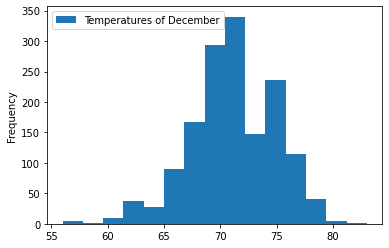

In [20]:
dfdic = pd.DataFrame(december, columns = ['Temperatures of December'])

dfdic.plot.hist(bins=15)

<AxesSubplot:xlabel='date'>

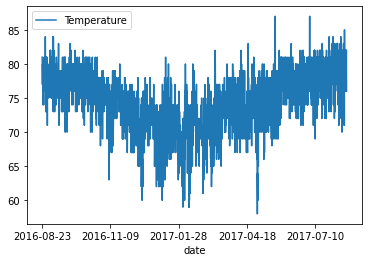

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
temp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(temp, columns=['date','Temperature'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
# print(df.to_string(index=False))

<AxesSubplot:xlabel='date'>

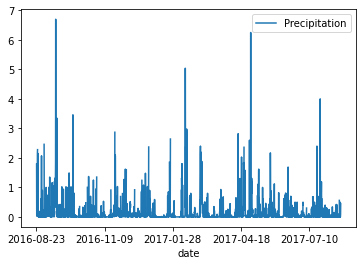

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23)
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
temp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(temp, columns=['date','Precipitation'])
df.set_index(df['date'], inplace=True)
# Sort the dataframe by date
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
# print(df.to_string(index=False))